## Importing Libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np 
from sklearn.metrics import accuracy_score

## Importing Data

In [2]:
df=pd.read_csv("C:\\Users\\sarka\\Downloads\\iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Spliting Dataset for train and test

In [5]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalLengthCm']]
Y=df[['Species']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

In [7]:
X_train.shape, X_test.shape

((100, 4), (50, 4))

## Building decision Tree Model

In [8]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [30]:
y_pred_gini = clf_gini.predict(X_test)

## Model Evaluation

In [34]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9400
Test set score: 0.9800


## Visualizing Decision Trees

[Text(251.10000000000002, 380.52, 'X[3] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(334.8, 271.8, 'X[2] <= 4.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(167.4, 163.07999999999998, 'X[0] <= 4.95\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]'),
 Text(83.7, 54.360000000000014, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[2] <= 5.15\ngini = 0.229\nsamples = 38\nvalue = [0, 5, 33]'),
 Text(418.5, 54.360000000000014, 'gini = 0.459\nsamples = 14\nvalue = [0, 5, 9]'),
 Text(585.9, 54.360000000000014, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 24]')]

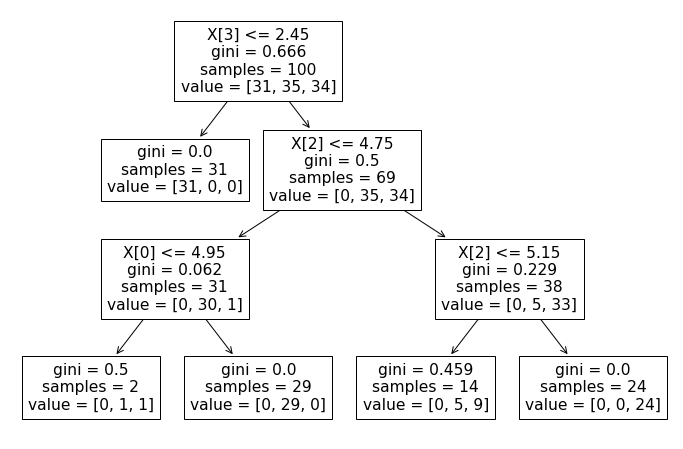

In [35]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))